# Loading the libraries and the Data

In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
# Importing data
df = pd.read_csv("/content/Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


# Data Exploration
Our main goal is to find patterns and consider what factors might cause the price of natural gas to vary. These will help us determine which model to use to forecast its price afterwards. To do that we will first plot the data and do some descriptive statistics.

<ipython-input-10-47ad92fd9b91>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


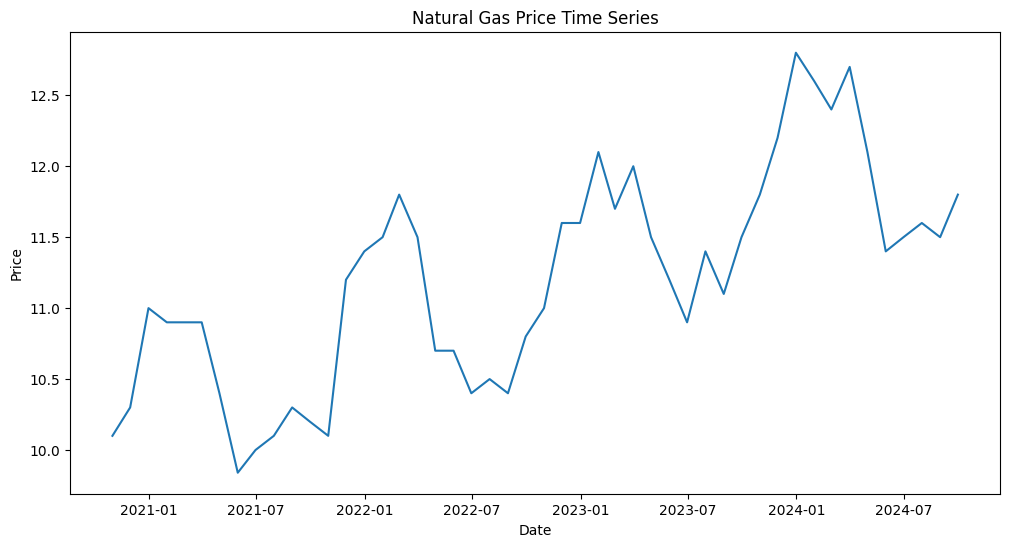

In [ ]:
# Convert the 'date' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Plot the time series data using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dates', y='Prices', data=df)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Price Time Series')
plt.show()

The figure illustrates significant fluctuations in natural gas prices over time. There is a discernible seasonal pattern, with prices typically rising towards the end of the year and falling around mid-year. Additionally, the prices exhibit an overall upward trend, indicating a general increase over the observed period.

In [ ]:
# Descriptive Statistics
print(f"Null values:\n{df.isnull().sum()}\n")
df.describe()

Null values:
Dates     0
Prices    0
dtype: int64



,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


These provided us a basic summary of the data, giving insights into central tendencies, variability, and overall distribution. The data seems to be clean enough with no missing values so we can now proceed into deeper explorations.

## Time series decomposition
As previously seen, the data seems to have a seasonal trend with prices rising towards the end of the year and falling around mid-year.

In order to confirm and explore this pattern, we'll do a time series decomposition. It allows us to separate the data into trend, seasonal, and residual components to better understand each part.

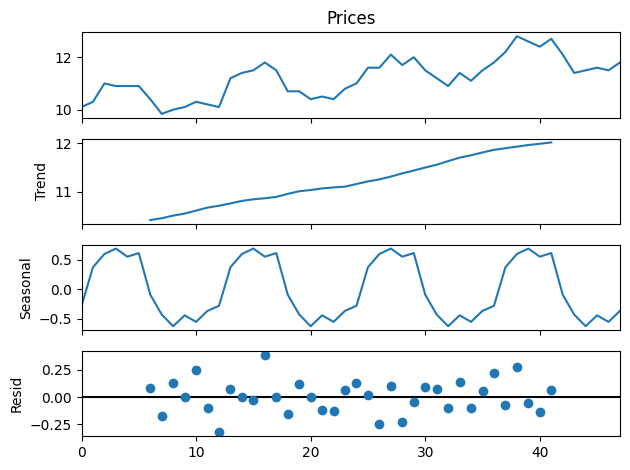

In [ ]:
# Decompose time series
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
decomposition.plot()
plt.show()


This is a very interesting figure, let's go over it step by step from the begining.

In the context of time series decomposition, the prices (the actual observed prices) can be broken down into three main components:

- **Trend** (***Tt***): The long-term progression of the series.
- **Seasonal** (***St***): The repeating cycle over the series.
- **Residual** (***Rt***): The remaining part of the series after removing the trend and seasonal components, representing random noise or irregularities.

The relationship can be expressed as:

***Yt= Tt + St + Rt***

with *Yt* as the observed price at t.


Let's go through each plot in detail.



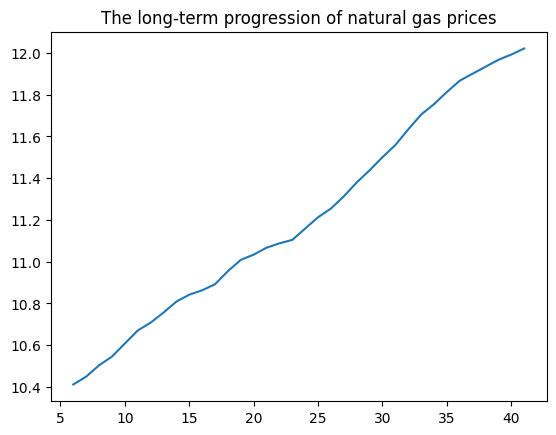

In [ ]:
trend.plot()
plt.title("The long-term progression of natural gas prices")
plt.show()

1. **Trend**

- Y-Axis: Represents the overall trend component of the prices, in other words the long-term progression of the time series data, excluding the short-term fluctuations and seasonality. If the trend shows values like 11, 12, it means that the general price level (ignoring seasonal effects and noise) is around those values.
- X-Axis: Similar to the observed prices, this axis is also represented as numbers, indicating the time sequence.
- Insight: The trend shows a general upward movement, indicating an overall increase in natural gas prices over the period.

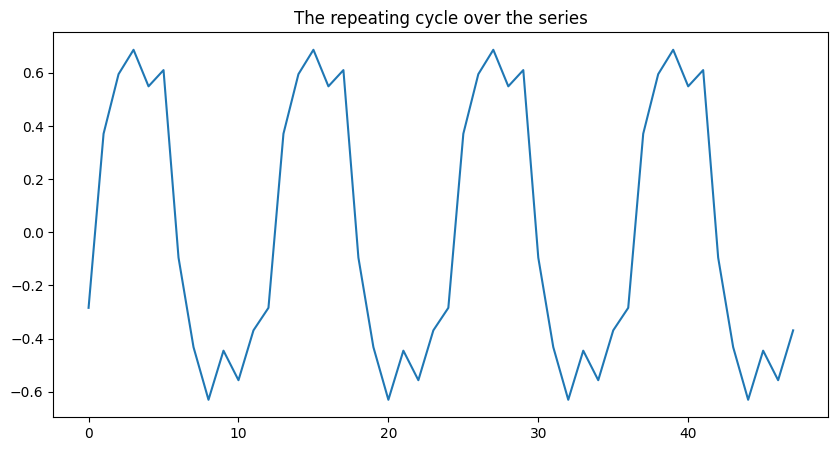

In [ ]:
# Seasonality component
plt.figure(figsize=(10, 5))
seasonal.plot()
plt.title("The repeating cycle over the series")
plt.show()

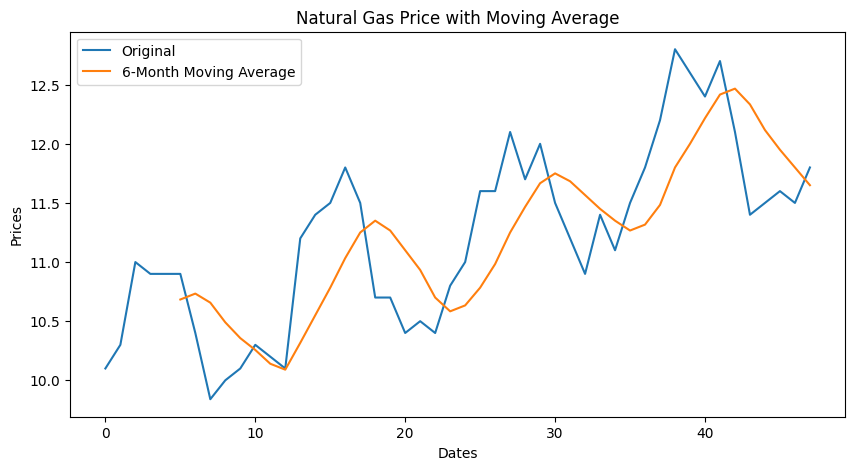

In [ ]:
# Moving average
df['6_Month_MA'] = df['Prices'].rolling(window=6).mean()

# Plot original and moving average
plt.figure(figsize=(10, 5))
plt.plot(df['Prices'], label='Original')
plt.plot(df['6_Month_MA'], label='6-Month Moving Average')
plt.title('Natural Gas Price with Moving Average')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()



2. **Seasonal**

- Y-Axis: Represents the seasonal component, which shows repeating patterns or cycles within a specific period. These values indicate how much the price deviates from the trend due to seasonal factors. For instance, a value of 0.5 means that, due to seasonal effects, the price is 0.5 units higher than the trend at that point in time.
- X-Axis: Also represented as numbers.
- Insight: The seasonal plot reveals a clear repeating pattern, indicating that natural gas prices have a seasonal cycle. Peaks and troughs recur at regular intervals, likely due to seasonal demand changes.

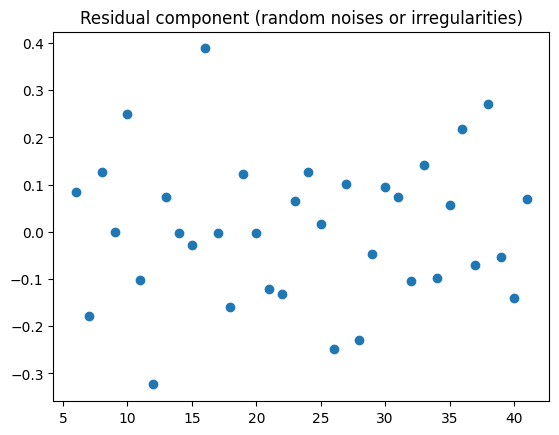

In [ ]:
# Residual component
plt.scatter(df.index, residual)
plt.title("Residual component (random noises or irregularities)")
plt.show()

3. **Residual**

- Y-Axis: Represents the residual component, which is the remaining part of the time series after removing the trend and seasonal components. These values are the deviations from the trend and seasonal components combined. They represent random fluctuations or irregularities that cannot be explained by the trend or seasonal components. The residual values should ideally hover around zero, indicating no systematic pattern.
- X-Axis: Again represents the periods.
- Insight: The residuals appear to be randomly distributed around zero, indicating that the model has effectively captured the trend and seasonality, and what remains are mostly random fluctuations.

## Autocorrelation and Partial Autocorrelation
In order to understand if the past prices has an impact over the actual prices, we will use Autocorrelation functions (ACF) and Partial Autocorrelation funcitons (APCF).

They measures the correlation of the time series with its past values to understand dependencies. Their plots are pretty similar, but they have different meanings.

- Y-Axis: Correlation coefficient, ranging from -1 to 1.
- X-Axis: Lag, representing the number of time steps between observations. It refers to the number of time steps between two points in a time series. In our case, since your data likely represents monthly natural gas prices, each lag represents one month.
- Significance Region (Shaded Area): The blue shaded area represents the confidence interval. Any bar outside this area indicates significant autocorrelation at that lag.

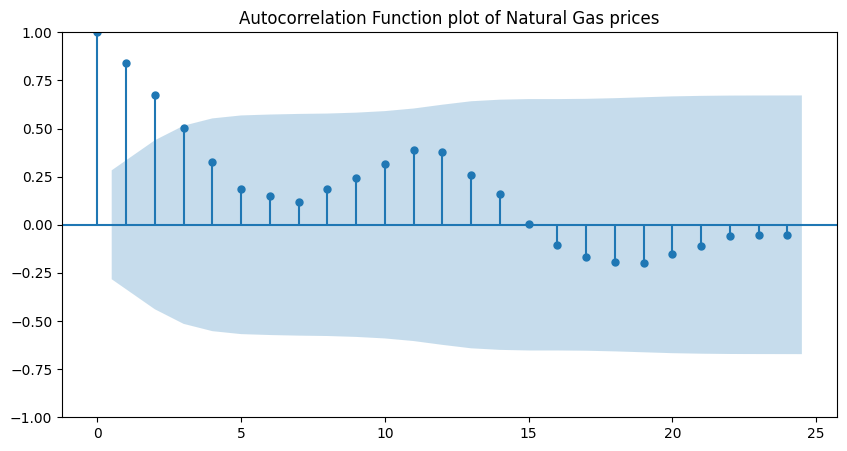

In [ ]:
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['Prices'].dropna(), lags=24, ax=ax)
plt.title("Autocorrelation Function plot of Natural Gas prices")
plt.show()

The ACF shows how the prices at different points in time are correlated with each other at different lags. Each point on the ACF plot represents the correlation between the time series and a lagged version of itself.

For example, a value of 0.25 at x = 5 means that the current price of the oil is positively correlated at 0.25 with its values 5 months ago.

**Insights**:
- Initial Positive Correlation: The first few lags show a strong positive correlation, indicating that prices are highly dependent on recent prices.
- Gradual Decay: The bars gradually decrease, suggesting that while there is some correlation with past values, it diminishes over time.
- Seasonal Pattern: The spikes at regular intervals (e.g., every 12 lags) may indicate seasonality, consistent with the idea that prices vary with a seasonal pattern.
- Non-Stationarity: The slowly decaying pattern of the ACF, combined with the potential seasonal pattern, suggests that the time series may be non-stationary, meaning that its statistical properties (such as mean and variance) are not constant over time.

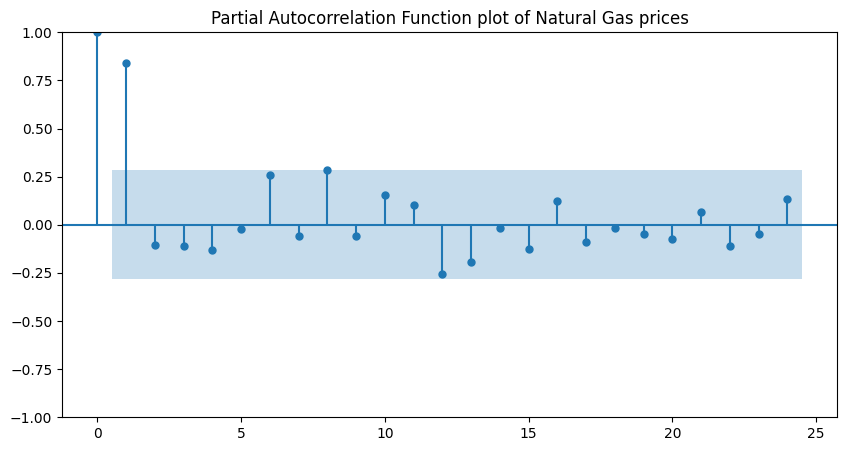

In [ ]:
# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))

plot_pacf(df['Prices'].dropna(), lags=24, ax=ax )
plt.title("Partial Autocorrelation Function plot of Natural Gas prices")
plt.show()

Like the ACF, PACF also measures the correlation between the time series and its past values at different lags. The main difference is that it removes the effects of the intermediate lags. It isolates the direct effect of each lag. For instance, a value of 0.25 at t = 6 means that if we remove the effects of the prices in month 0, 1, 2, 3, 4, 5 on the price at month 6, the correlation is 0.25.

Insights:
- Significant Spike at Lag 1: The PACF plot shows a significant spike at lag 1, indicating a strong autocorrelation between the current observation and the immediately preceding observation. This suggests the presence of an autoregressive (AR) component in the time series.
-  After the significant spike at lag 1, the PACF values exhibit an exponential decay pattern, with the values gradually decreasing towards zero. This pattern is often indicative of an autoregressive process with a specific order.

# Prediction
Based on the data exploration we did, we can proceed to the model selection and then to the price prediction.

### Summary of Insights from Data Exploration

#### 1. **Time Series Decomposition**
- **Trend Component**: The trend shows a gradual upward movement in natural gas prices over the observed period. This indicates a long-term increase in prices.
- **Seasonal Component**: The seasonal pattern repeats annually, with prices typically rising towards the end of the year and declining around mid-year. This suggests a strong seasonal effect that needs to be accounted for in our forecasting model.
- **Residual Component**: The residuals appear to be relatively small and randomly distributed around zero, indicating that the decomposition model has captured most of the variability in the data.

#### 2. **Autocorrelation Function (ACF)**
- **Significant Lags**: The ACF plot shows significant correlations at multiple lags, indicating that past prices are correlated with future prices. This suggests that the time series is not purely random and has a structure that can be modeled.
- **Seasonality**: The periodic peaks in the ACF plot reinforce the presence of seasonality in the data, with a repeating pattern approximately every 12 months.

#### 3. **Partial Autocorrelation Function (PACF)**
- **Significant Lags**: The PACF plot shows significant correlations primarily at lag 1, with smaller peaks at subsequent lags. This indicates that the immediate past price has a strong influence on the current price, and there are some additional dependencies that decay quickly.
- **Intermediate Lags**: The PACF helps isolate the direct effect of previous prices, confirming the need to include lagged terms in our model.

### Decision on Model Selection

#### Combination of SARIMA and XGBoost
- **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**
  - **Why SARIMA**: Given the clear trend and strong seasonal component in the data, SARIMA is well-suited as it explicitly models both seasonality and trends. It can capture the periodic fluctuations and long-term movements effectively.
  - **Benefits**: SARIMA handles seasonality and trend components natively, providing a robust framework for time series forecasting.
  - **Limitations**: SARIMA may struggle with capturing complex, non-linear patterns that are not well-represented by linear relationships.

- **XGBoost (Extreme Gradient Boosting)**
  - **Why XGBoost**: XGBoost can handle non-linear relationships and interactions between features, complementing SARIMA's linear approach. By including additional features such as lagged values, rolling statistics, and external variables, XGBoost can capture patterns that SARIMA might miss.
  - **Benefits**: High predictive accuracy, flexibility to incorporate various features, and robustness to overfitting through regularization techniques.
  - **Limitations**: Requires careful feature engineering and hyperparameter tuning. Computationally intensive compared to simpler models.

#### Why Not Other Models
- **LSTM (Long Short-Term Memory) Networks**
  - **Complexity**: While powerful, LSTMs require substantial computational resources and large datasets to train effectively. They also require more time for hyperparameter tuning and are more prone to overfitting with limited data.
- **ARIMA/ARMA**
  - **Lack of Seasonality Handling**: ARIMA/ARMA models do not handle seasonality as well as SARIMA, making them less suitable for our data with strong seasonal patterns.

### Conclusion
By combining SARIMA and XGBoost, we leverage the strengths of both models. SARIMA will effectively model the trend and seasonal components, while XGBoost will capture any remaining non-linear relationships and interactions. This hybrid approach is expected to provide more accurate and robust forecasts for natural gas prices, taking advantage of the complementary strengths of both models.